# Machine Learning
## Programming Assignment 6: Naive Bayes

Instructions:
The aim of this assignment is to give you hands-on experience with a real-life machine learning application.
You will be analyzing the sentiment of reviews using Naive Bayes classification.
You can only use the Python programming language and Jupyter Notebooks.
Please use procedural programming style and comment your code thoroughly.
There are two parts of this assignment. In part 1, you can use NumPy, Pandas, Matplotlib, and any other standard Python libraries. You are not allowed to use NLTK, scikit-learn, or any other machine learning toolkit. You can only use scikit-learn in part 2.

### Part 1: Implementing Naive Bayes classifier from scratch (60 points)

You are not allowed to use scikit-learn or any other machine learning toolkit for this part. You have to implement your own Naive Bayes classifier from scratch. You may use Pandas, NumPy, Matplotlib, and other standard Python libraries.

#### Problem:
The purpose of this assignment is to get you familiar with Naive Bayes classification. The core dataset contains 50,000 reviews split evenly into 25k train and 25k test sets. The overall distribution of labels is balanced (25k pos and 25k neg). There are two top-level directories [train/, test/] corresponding to the training and test sets. Each contains [pos/, neg/] directories for the reviews with binary labels positive and negative. Within these directories, reviews are stored in text files named following the convention [[id]_[rating].txt] where [id] is a unique id and [rating] is the star rating for that review on a 1-10 scale. For example, the file [test/pos/200_8.txt] is the text for a positive-labeled testset example with unique id 200 and star rating 8/10 from IMDb.


In [1]:
## Here are the libraries you will need for this part/
import pandas as pd
import numpy as np
import scipy.spatial as sc
import matplotlib.pyplot as plt
import re
import random
%matplotlib inline

#### Task 1.1: Dataset (5 points)
Your task is to read the dataset and stopwords file into a useful data structure. Print out a few reviews and a few items from the stop word list, succesfully being able to do this will earn you 5 points.

In [29]:
import os

train_pos_path = "Naive Bayes Data/train/pos"
train_neg_path = "Naive Bayes Data/train/neg"
test_pos_path = "Naive Bayes Data/test/pos"
test_neg_path = "Naive Bayes Data/test/neg"
stop_words_path = "Naive Bayes Data/stop_words.txt"

with open(stop_words_path, "r", encoding="utf-8") as f:
    stop_words = [line.strip() for line in f if line.strip()]


def load_reviews(folder_path, label):
    data = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, "r", encoding="utf-8") as f:
            data.append((f.read().strip(), label))
    return data


all_reviews = load_reviews(train_pos_path , 1) +  load_reviews(train_neg_path , 0) + load_reviews(test_pos_path , 1) +  load_reviews(test_neg_path , 0)


In [33]:
print("Sample Stop Words:", stop_words[:10])
print("\nSample Reviews:")
print("\n", all_reviews[0] )
print("\n", all_reviews[1] )
print("\n", all_reviews[2] )
print("\n", all_reviews[3] )
print("\n", all_reviews[4] )

Sample Stop Words: ['i', "i'm", 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you']

Sample Reviews:

 ('Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!', 1)

 ('Homelessness (or Houselessness as George Carlin stated) has been

#### Task 1.2: Data Preprocessing (10 points)

In the preprocessing step, you’re required to remove the stop words, punctuation marks, numbers, unwanted symbols, hyperlinks, and usernames from the tweets and convert them to lower case. You may find the string and regex module useful for this purpose. Use the stop word list provided within the assignment.

Print out a few random reviews from your dataset, if they conform to the rules mentioned above, you will gain 10 points.

In [31]:
def preprocess_text(text, stopwords):
    
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'@\w+|\#', '', text)   
    text = re.sub(r'\d+', '', text) 
    text = re.sub(r'[^a-z\s]', '', text)                
    tokens = [word for word in text.split() if word not in stopwords]
    return tokens 


In [32]:
preprocessed_data = [
    (preprocess_text(review, stop_words), label) 
    for review, label in all_reviews
]

In [14]:
print("Random Preprocessed Reviews:")
for review, label in random.sample(preprocessed_data, 5):
    print(f"Label: {label} | Review: {review}")

Random Preprocessed Reviews:
Label: 1 | Review: ['anyone', 'love', 'movie', 'think', 'hilarious', 'spoof', 'old', 'gangster', 'movies', 'youve', 'never', 'seen', 'watch', 'instead', 'michael', 'keaton', 'ball', 'role', 'anything', 'goes', 'one', 'guy', 'mangles', 'english', 'language', 'everytime', 'talks', 'griffin', 'dunn', 'plays', 'clueless', 'da', 'favorite', 'role', 'got', 'joe', 'piscopo', 'best', 'lines', 'danny', 'devito', 'alan', 'hale', 'ray', 'walston', 'starstudded', 'movie', 'lampoons', 'gangsters', 'lot', 'funnier', 'mafia', 'criminal', 'underground']
Label: 1 | Review: ['film', 'partly', 'thriller', 'partly', 'publicservice', 'announcement', 'seeing', 'events', 'perspectives', 'politicians', 'terrorists', 'course', 'victims', 'smart', 'drama', 'lessons', 'given', 'contamination', 'surviving', 'chaos', 'meantime', 'backstage', 'look', 'way', 'crisis', 'managed', 'prompts', 'viewers', 'distrust', 'guardians', 'scared', 'assailants', 'film', 'originally', 'aired', 'bbc', '

#### Task 1.3: Splitting the dataset (5 points)

In this part, divide the given dataset into training and testing sets based on an 80-20 split using python.
Print out the sizes of the training dataset and test dataset, training data should contain 40000 reviews and test data should contain 10000 reviews. If your sizes are correct, you get full points.

In [51]:
random.shuffle(preprocessed_data)
split_index = int(0.8 * len(preprocessed_data))
train_data = preprocessed_data[:split_index]
test_data = preprocessed_data[split_index:]
print("Training Data Size:", len(train_data))
print("Testing Data Size:", len(test_data))

Training Data Size: 40000
Testing Data Size: 10000


In [52]:
print("train_data" , train_data[1])

train_data (['really', 'enjoyed', 'random', 'hearts', 'shocking', 'see', 'low', 'rating', 'imdb', 'chacun', 'son', 'gout', 'big', 'fan', 'harrison', 'ford', 'admit', 'ill', 'cast', 'movie', 'reason', 'gave', 'instead', 'kristin', 'scott', 'thomas', 'though', 'wonderful', 'believable', 'beautiful', 'spite', 'made', 'half', 'movie', 'like', 'shed', 'crying', 'days', 'could', 'random', 'hearts', 'better', 'sure', 'much', 'worth', 'seeing'], 1)


#### Task 1.4: Create Naive Bayes classifier (30 points)

You will create your own Naive Neighbors classifier function by implementing the following algorithm

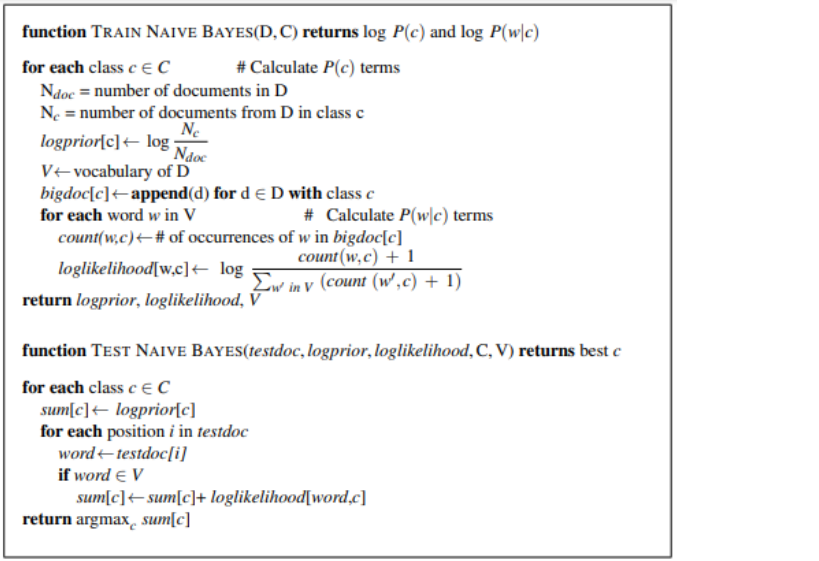

In [ ]:
from IPython.display import Image, display
display(Image(filename='NBAlgo.png'))

In [53]:

def count_words(word_list):
    word_freq = {}
    for word in word_list:
        word_freq[word] = word_freq.get(word, 0) + 1
    return word_freq

def train_naive_bayes(D, C):
    logprior = {}
    loglikelihood = {}
    bigdoc = {c: [] for c in C}
    word_counts = {c: {} for c in C}
    vocabulary = set()
    label_count = {}

    total_docs = len(D)

    # bigdoc and label counts
    for tokens, label in D:
        label_count[label] = label_count.get(label, 0) + 1
        bigdoc[label].extend(tokens)
        vocabulary.update(tokens)

    # word frequencies manual
    for c in C:
        word_counts[c] = count_words(bigdoc[c])

    V = len(vocabulary)

    # logprior for each class
    for c in C:
        logprior[c] = np.log(label_count[c] / total_docs)

    # calculating loglikelihood with Laplace smoothing
    for c in C:
        total_wc = sum(word_counts[c].values())
        for word in vocabulary:
            count_wc = word_counts[c].get(word, 0)
            loglikelihood[(word, c)] = np.log((count_wc + 1) / (total_wc + V))

    return logprior, loglikelihood, vocabulary




def test_naive_bayes(testdoc, logprior, loglikelihood, C, vocabulary):

    scores = {}
    for c in C:
        # starting with prior
        scores[c] = logprior[c]  
        for word in testdoc:
            if word in vocabulary:
                # adding likelihood
                scores[c] += loglikelihood.get((word, c), 0)  
    return max(scores, key=scores.get) 

In [54]:
logprior, loglikelihood, vocabulary = train_naive_bayes(train_data, [0, 1])

In [55]:
y_true = []
y_pred = []
for tokens, label in test_data:
    pred = test_naive_bayes(tokens, logprior, loglikelihood, [0, 1], vocabulary)
    y_true.append(label)
    y_pred.append(pred)

#### Task 1.5: Implement evaluation functions (10 points)

Implement evaluation functions that calculates the:
- classification accuracy,
- F1 score,
- and the confusion matrix
of your classifier on the test set.


In [56]:
def classification_accuracy(y_true, y_pred):
   
    correct = np.sum(np.array(y_true) == np.array(y_pred))
    return correct / len(y_true)


def f1_score_binary(y_true, y_pred):
    
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    if tp == 0:  
        return 0.0

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0

    if precision + recall == 0:
        return 0.0

    return 2 * (precision * recall) / (precision + recall)


def confusion_matrix_binary(y_true, y_pred):
    
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    return np.array([[tn, fp],
                     [fn, tp]])

In [57]:
print("Accuracy:", classification_accuracy(y_true, y_pred))
print("F1 Score:", f1_score_binary(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix_binary(y_true, y_pred))

Accuracy: 0.8591
F1 Score: 0.8556796066782753
Confusion Matrix:
 [[4414  598]
 [ 811 4177]]


### Part 2:  Naive Bayes classifier using scikit-learn (40 points)

In this part, use scikit-learn’s CountVectorizer to transform your train and test set to bag-of-words representation and Naïve Bayes implementation to train and test the Naïve Bayes on the provided dataset. Use scikit-learn’s accuracy_score function to calculate the accuracy and confusion_matrix function to calculate the confusion matrix on the test set.

In [63]:
# Here are the libraries and specific functions you will be needing for this part

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [64]:
#using unprocessed data for CountVectorizer
split_index = int(0.8 * len(all_reviews))
reviews_train_data = all_reviews[:split_index]
reviews_test_data = all_reviews[split_index:]
print("Training Data Size:", len(reviews_train_data))
print("Testing Data Size:", len(reviews_test_data))
print("Sample Training Review:", reviews_train_data[0])

X_train = [text for text, label in reviews_train_data]
y_train = [label for text, label in reviews_train_data]
X_test = [text for text, label in reviews_test_data]
y_test = [label for text, label in reviews_test_data]
print("sample X_train:", X_train[0])

Training Data Size: 40000
Testing Data Size: 10000
Sample Training Review: ('Normally, I have no problem with a movie or story with an ending that leaves you wondering to puzzle out what really happened, when it\'s done on purpose...<br /><br />But this movie really feels like they got all but the last 15 minutes done, then realized they had $5 left to finish on...<br /><br />I saw it on TBS... I recommend you not spend money on it either. If you catch it on TV, watch all but the last 15 minutes, then walk away and make your own ending in your mind.<br /><br />Really, the movie would have been better if they had simply got away, and come back with the State Poice of Feds only to find that the town and the car graveyard was gone, and by all appearances had never been there...<br /><br />"Wish I had more thumbs, so I could give that movie 4 thumbs down!"', 0)
sample X_train: Normally, I have no problem with a movie or story with an ending that leaves you wondering to puzzle out what real

In [65]:
vectorizer = CountVectorizer(stop_words=stop_words, lowercase=True , ngram_range=(1, 2), min_df=5, max_df=0.8)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [66]:
nb = MultinomialNB(alpha=0.5)  
nb.fit(X_train_vec, y_train)

# Predict 
y_pred = nb.predict(X_test_vec)

# evaluate
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8828
Confusion Matrix:
 [[4383  579]
 [ 593 4445]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      4962
           1       0.88      0.88      0.88      5038

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

